In [1]:
import pandas as pd

In [8]:
#Read the csv file
df = pd.read_csv('/dataset1.csv')

In [6]:
#Checking for any missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64


In [9]:
#Replacing missing values with the mode
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [10]:
#Rechecking for missing values
missing_values_after_handling = df.isnull().sum()
print("Missing values after handling:\n", missing_values_after_handling)

Missing values after handling:
 Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64


In [11]:
# Display the data types of each column
data_types = df.dtypes
print("Data types:\n", data_types)

Data types:
 Index            int64
Age            float64
Salary          object
Rating         float64
Location        object
Established      int64
Easy Apply      object
dtype: object


In [22]:
# Remove "$" from the "Salary" column and convert it to numeric
df['Salary'] = pd.to_numeric(df['Salary'].replace('[\$,]', '', regex=True), errors='coerce')
# Display data types after the conversion
data_types_after_conversion = df.dtypes
print("Data types after conversion:\n", data_types_after_conversion)


Data types after conversion:
 Index            int64
Age            float64
Salary         float64
Rating         float64
Location        object
Established      int64
Easy Apply      object
dtype: object


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np


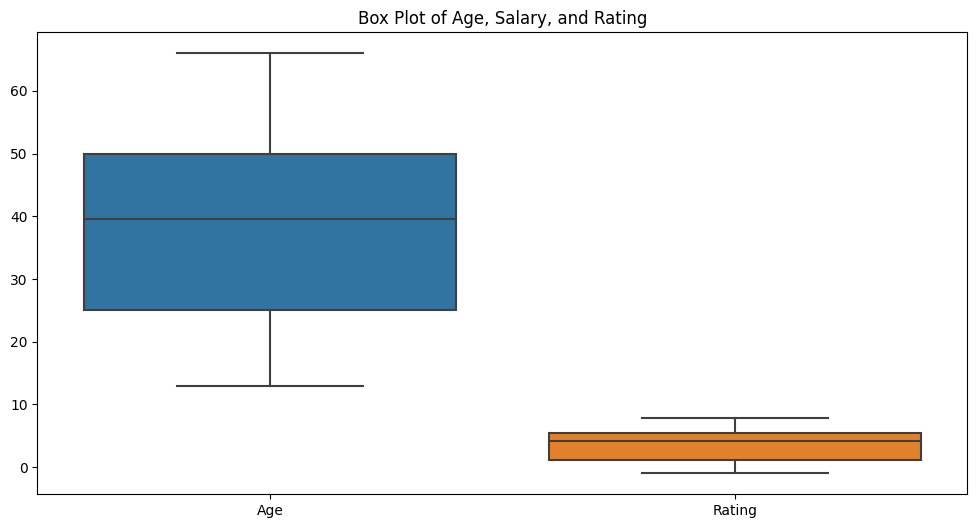

In [16]:
# Visualize the distribution of specific numerical indicators using box plots
columns_of_interest = ["Age", "Salary", "Rating"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_of_interest])
plt.title("Box Plot of Age, Salary, and Rating")
plt.show()


In [23]:
# Calculate z-scores for specific numerical columns
z_scores = zscore(df[columns_of_interest])

# Define a threshold for identifying outliers (e.g., z-score > 3 or z-score < -3)
outlier_threshold = 3
outliers = (abs(z_scores) > outlier_threshold).any(axis=1)

# Display rows with potential outliers
potential_outliers = df[outliers]
print("Potential Outliers:\n", potential_outliers)


Potential Outliers:
 Empty DataFrame
Columns: [Index, Age, Salary, Rating, Location, Established, Easy Apply]
Index: []


In [24]:
# Remove rows containing outliers
df_no_outliers = df[~outliers]


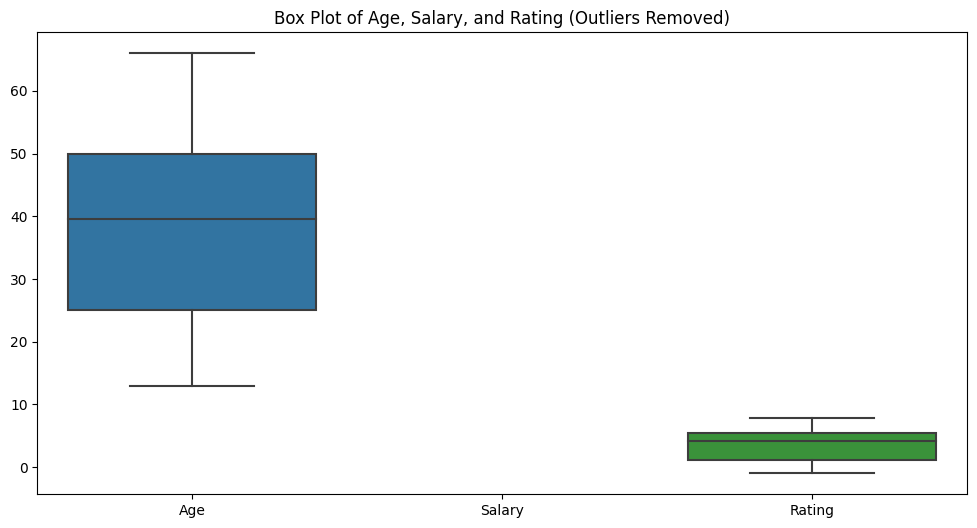

In [28]:
# Visualize the distribution of specific numerical indicators after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[columns_of_interest])
plt.title("Box Plot of Age, Salary, and Rating (Outliers Removed)")
plt.show()

In [29]:
# Display unique values in the "Location" column
unique_locations = df['Location'].unique()
print("Unique Locations:\n", unique_locations)


Unique Locations:
 ['India,In' 'New York,Ny' 'India In' 'Australia Aus']


In [30]:
# Standardize the "Location" column to uppercase
df['Location'] = df['Location'].str.upper()


In [31]:
# Remove leading and trailing whitespaces from the "Location" column
df['Location'] = df['Location'].str.strip()


In [32]:
# Display unique values in the "Location" column after standardization
unique_locations_after_standardization = df['Location'].unique()
print("Unique Locations after Standardization:\n", unique_locations_after_standardization)

Unique Locations after Standardization:
 ['INDIA,IN' 'NEW YORK,NY' 'INDIA IN' 'AUSTRALIA AUS']


In [33]:
# Display unique values and basic statistics for the "Established" column
established_info = df['Established'].describe()
print("Established Column Info:\n", established_info)


Established Column Info:
 count      29.000000
mean     1638.620690
std       762.079599
min        -1.000000
25%      1935.000000
50%      1984.000000
75%      1999.000000
max      2020.000000
Name: Established, dtype: float64


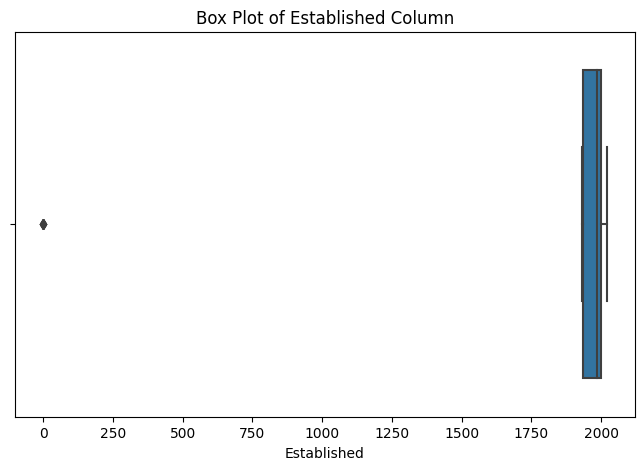

In [35]:
# Visualize the distribution of numeric values in the "Established" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Established'].astype(float))
plt.title("Box Plot of Established Column")
plt.show()


In [38]:
# Display unique values and basic statistics for the "Established" column after handling
established_info_after_handling = df['Established'].describe()
print("Established Column Info after Handling:\n", established_info_after_handling)

Established Column Info after Handling:
 count      29.000000
mean     1638.620690
std       762.079599
min        -1.000000
25%      1935.000000
50%      1984.000000
75%      1999.000000
max      2020.000000
Name: Established, dtype: float64


In [39]:
# Display unique values and basic statistics for the "Easy Apply" column
easy_apply_info = df['Easy Apply'].describe()
print("Easy Apply Column Info:\n", easy_apply_info)


Easy Apply Column Info:
 count       29
unique       2
top       TRUE
freq        15
Name: Easy Apply, dtype: object


In [40]:
# Display unique values in the "Easy Apply" column
unique_values_easy_apply = df['Easy Apply'].unique()
print("Unique Values in Easy Apply Column:\n", unique_values_easy_apply)


Unique Values in Easy Apply Column:
 ['TRUE' '-1']


In [41]:
# Convert the "Easy Apply" column to boolean
df['Easy Apply'] = df['Easy Apply'].map({'True': True, 'False': False})


In [42]:
# Convert the "Easy Apply" column to numeric (1 for True, 0 for False)
df['Easy Apply'] = df['Easy Apply'].map({'True': 1, 'False': 0})


In [43]:
# Display unique values and basic statistics for the "Easy Apply" column after transformation
easy_apply_info_after_transformation = df['Easy Apply'].describe()
print("Easy Apply Column Info after Transformation:\n", easy_apply_info_after_transformation)


Easy Apply Column Info after Transformation:
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Easy Apply, dtype: float64


Rating Column Info:
 count    28.000000
mean      3.528571
std       2.825133
min      -1.000000
25%       1.050000
50%       4.200000
75%       5.400000
max       7.800000
Name: Rating, dtype: float64


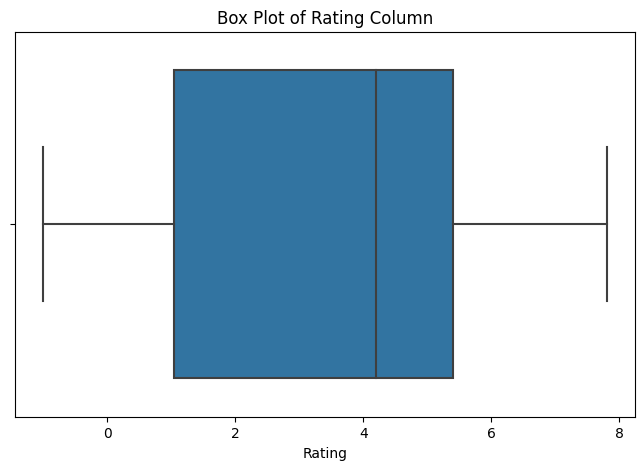

Potential Outliers in Rating Column:
 Empty DataFrame
Columns: [Rating]
Index: []
Rating Column Info after Handling Outliers:
 count    28.000000
mean      3.528571
std       2.825133
min      -1.000000
25%       1.050000
50%       4.200000
75%       5.400000
max       7.800000
Name: Rating, dtype: float64


In [44]:
# Display unique values and basic statistics for the "Rating" column
rating_info = df['Rating'].describe()
print("Rating Column Info:\n", rating_info)

# Visualize the distribution of numeric values in the "Rating" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Rating'].astype(float))
plt.title("Box Plot of Rating Column")
plt.show()

# Identify potential outliers in the "Rating" column
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for identifying outliers (e.g., Q1 - 1.5 * IQR or Q3 + 1.5 * IQR)
outlier_threshold = 1.5
outliers = ((df['Rating'] < (Q1 - outlier_threshold * IQR)) | (df['Rating'] > (Q3 + outlier_threshold * IQR)))

# Display rows with potential outliers in the "Rating" column
potential_outliers = df[outliers]
print("Potential Outliers in Rating Column:\n", potential_outliers[['Rating']])

# Decide on handling strategy (e.g., removal, adjustment, transformation)

# Example: Remove rows with outliers
df_no_outliers = df[~outliers]

# Verify changes
rating_info_after_handling = df_no_outliers['Rating'].describe()
print("Rating Column Info after Handling Outliers:\n", rating_info_after_handling)


Age Column Info:
 count    22.000000
mean     39.045455
std      16.134781
min      13.000000
25%      25.000000
50%      39.500000
75%      50.000000
max      66.000000
Name: Age, dtype: float64


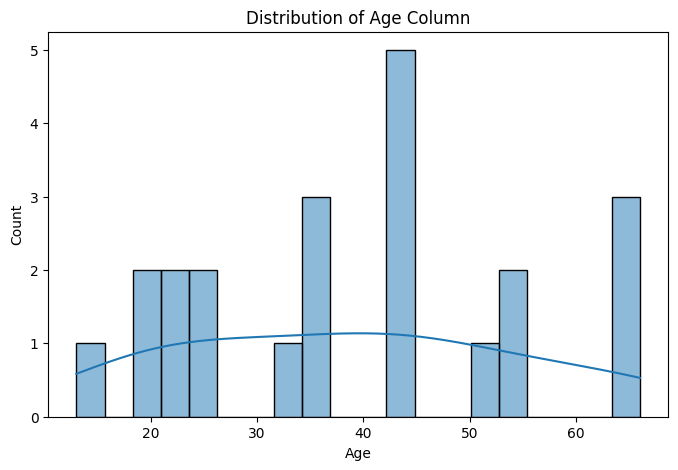

Unusual Entries in Age Column:
      Age
1   66.0
14  66.0
24  13.0
Age Column Info after Handling Unusual Entries:
 count    19.000000
mean     37.578947
std      13.529046
min      19.000000
25%      25.000000
50%      35.000000
75%      44.000000
max      64.000000
Name: Age, dtype: float64


In [45]:
# Display unique values and basic statistics for the "Age" column
age_info = df['Age'].describe()
print("Age Column Info:\n", age_info)

# Visualize the distribution of numeric values in the "Age" column
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribution of Age Column")
plt.show()

# Identify potential unusual entries in the "Age" column
# Example: Consider entries outside a reasonable age range (e.g., 18-65)
unusual_entries = df[(df['Age'] < 18) | (df['Age'] > 65)]
print("Unusual Entries in Age Column:\n", unusual_entries[['Age']])

# Consider the impact of unusual entries on analysis and decide on handling strategy

# Example: Remove rows with unusual entries
df_no_unusual_entries = df[(df['Age'] >= 18) & (df['Age'] <= 65)]

# Verify changes
age_info_after_handling = df_no_unusual_entries['Age'].describe()
print("Age Column Info after Handling Unusual Entries:\n", age_info_after_handling)


In [46]:
# Display information about text-based columns
text_columns = df.select_dtypes(include='object').columns
print("Text-based Columns:\n", text_columns)

# Loop through each text-based column and examine for special characters
for column in text_columns:
    print(f"\nExamining {column} column:")

    # Check for special characters or inconsistencies
    for index, value in df[column].items():
        # Example: Check for non-alphanumeric characters
        if any(char.isalnum() for char in str(value)):
            continue
        else:
            print(f"Row {index}: Special character found - {value}")

    # Clean the column (replace or remove special characters)
    # Example: Remove non-alphanumeric characters
    df[column] = df[column].apply(lambda x: ''.join(char for char in str(x) if char.isalnum() or char.isspace()))

# Display the cleaned DataFrame
print("\nCleaned DataFrame:\n", df)


Text-based Columns:
 Index(['Location'], dtype='object')

Examining Location column:

Cleaned DataFrame:
     Index   Age  Salary  Rating       Location  Established  Easy Apply
0       0  44.0     NaN     5.4        INDIAIN         1999         NaN
1       1  66.0     NaN     3.5     NEW YORKNY         2002         NaN
2       2   NaN     NaN    -1.0     NEW YORKNY           -1         NaN
3       3  64.0     NaN     4.4       INDIA IN         1988         NaN
4       4  25.0     NaN     6.4  AUSTRALIA AUS         2002         NaN
5       5  44.0     NaN     1.4        INDIAIN         1999         NaN
6       6  21.0     NaN     0.0     NEW YORKNY           -1         NaN
7       7  44.0     NaN    -1.0  AUSTRALIA AUS           -1         NaN
8       8  35.0     NaN     5.4     NEW YORKNY           -1         NaN
9       9  22.0     NaN     7.7        INDIAIN           -1         NaN
10     10  55.0     NaN     5.4        INDIAIN         2008         NaN
11     11  44.0     NaN     6.

In [47]:
# Check for inconsistencies between the "Established" and "Age" columns
inconsistencies = df[df['Established'].notnull() & df['Age'].notnull() & (df['Established'] != df['Age'])]

# Display rows with inconsistencies
print("Rows with inconsistencies between Established and Age columns:\n", inconsistencies)


Rows with inconsistencies between Established and Age columns:
     Index   Age  Salary  Rating       Location  Established  Easy Apply
0       0  44.0     NaN     5.4        INDIAIN         1999         NaN
1       1  66.0     NaN     3.5     NEW YORKNY         2002         NaN
3       3  64.0     NaN     4.4       INDIA IN         1988         NaN
4       4  25.0     NaN     6.4  AUSTRALIA AUS         2002         NaN
5       5  44.0     NaN     1.4        INDIAIN         1999         NaN
6       6  21.0     NaN     0.0     NEW YORKNY           -1         NaN
7       7  44.0     NaN    -1.0  AUSTRALIA AUS           -1         NaN
8       8  35.0     NaN     5.4     NEW YORKNY           -1         NaN
9       9  22.0     NaN     7.7        INDIAIN           -1         NaN
10     10  55.0     NaN     5.4        INDIAIN         2008         NaN
11     11  44.0     NaN     6.7        INDIAIN         2009         NaN
13     13  25.0     NaN    -1.0  AUSTRALIA AUS         2019         NaN


In [48]:
# Display unique values in the "Easy Apply" column
unique_values_easy_apply = df['Easy Apply'].unique()
print("Unique Values in Easy Apply Column:\n", unique_values_easy_apply)

# Convert "True" and "False" strings to boolean values
df['Easy Apply'] = df['Easy Apply'].map({'True': True, 'False': False})

# Display the updated DataFrame
print("\nUpdated DataFrame:\n", df)


Unique Values in Easy Apply Column:
 [nan]

Updated DataFrame:
     Index   Age  Salary  Rating       Location  Established Easy Apply
0       0  44.0     NaN     5.4        INDIAIN         1999        NaN
1       1  66.0     NaN     3.5     NEW YORKNY         2002        NaN
2       2   NaN     NaN    -1.0     NEW YORKNY           -1        NaN
3       3  64.0     NaN     4.4       INDIA IN         1988        NaN
4       4  25.0     NaN     6.4  AUSTRALIA AUS         2002        NaN
5       5  44.0     NaN     1.4        INDIAIN         1999        NaN
6       6  21.0     NaN     0.0     NEW YORKNY           -1        NaN
7       7  44.0     NaN    -1.0  AUSTRALIA AUS           -1        NaN
8       8  35.0     NaN     5.4     NEW YORKNY           -1        NaN
9       9  22.0     NaN     7.7        INDIAIN           -1        NaN
10     10  55.0     NaN     5.4        INDIAIN         2008        NaN
11     11  44.0     NaN     6.7        INDIAIN         2009        NaN
12     12   N

Unique Locations:
 ['INDIAIN' 'NEW YORKNY' 'INDIA IN' 'AUSTRALIA AUS']


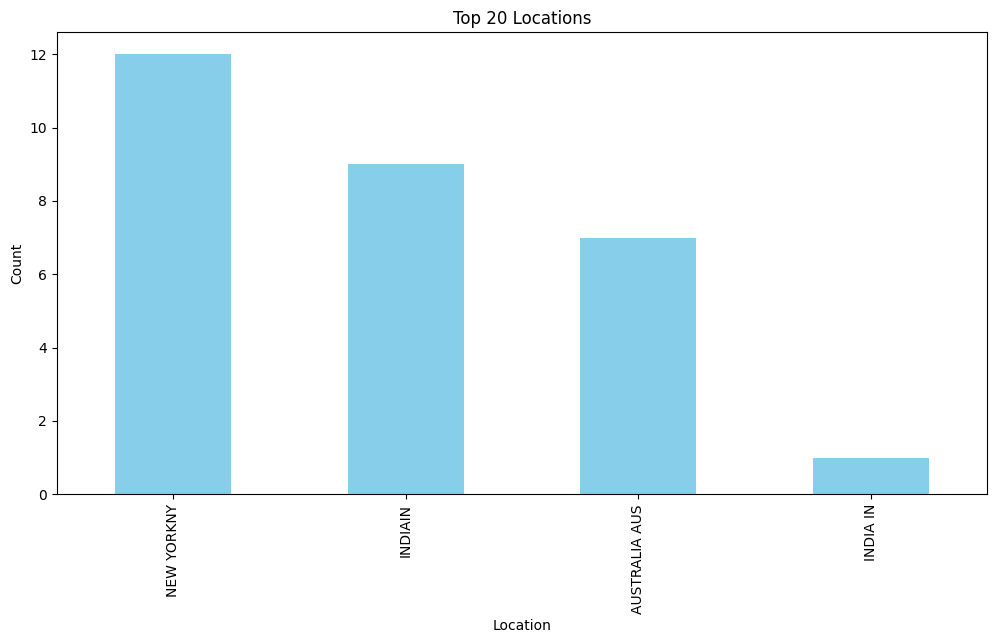

In [49]:
# Display unique values in the "Location" column
unique_locations = df['Location'].unique()
print("Unique Locations:\n", unique_locations)

# Visualize the distribution of locations
location_counts = df['Location'].value_counts()

# Plot the top 20 locations for better visibility
plt.figure(figsize=(12, 6))
location_counts.head(20).plot(kind='bar', color='skyblue')
plt.title("Top 20 Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()


In [51]:
from sklearn.preprocessing import LabelEncoder
# Display unique values in a categorical column (replace 'your_column' with the actual column name)
categorical_column = 'Age'
unique_values = df[categorical_column].unique()
print(f"Unique values in {categorical_column}:\n", unique_values)

# Use LabelEncoder to transform categorical values into numerical labels
label_encoder = LabelEncoder()
df[categorical_column + '_encoded'] = label_encoder.fit_transform(df[categorical_column])

# Display the updated DataFrame with the encoded column
print("\nUpdated DataFrame with Label Encoding:\n", df)


Unique values in Age:
 [44. 66. nan 64. 25. 21. 35. 22. 55. 19. 32. 13. 52.]

Updated DataFrame with Label Encoding:
     Index   Age  Salary  Rating       Location  Established Easy Apply  \
0       0  44.0     NaN     5.4        INDIAIN         1999        NaN   
1       1  66.0     NaN     3.5     NEW YORKNY         2002        NaN   
2       2   NaN     NaN    -1.0     NEW YORKNY           -1        NaN   
3       3  64.0     NaN     4.4       INDIA IN         1988        NaN   
4       4  25.0     NaN     6.4  AUSTRALIA AUS         2002        NaN   
5       5  44.0     NaN     1.4        INDIAIN         1999        NaN   
6       6  21.0     NaN     0.0     NEW YORKNY           -1        NaN   
7       7  44.0     NaN    -1.0  AUSTRALIA AUS           -1        NaN   
8       8  35.0     NaN     5.4     NEW YORKNY           -1        NaN   
9       9  22.0     NaN     7.7        INDIAIN           -1        NaN   
10     10  55.0     NaN     5.4        INDIAIN         2008        N

In [52]:
# Display unique values in the "Rating" column
unique_ratings = df['Rating'].unique()
print("Unique Ratings:\n", unique_ratings)

# Assess the current rating scale and determine if normalization or adjustment is needed
# Example: If ratings are on a different scale (e.g., 1-10 and 1-5), you might want to normalize them.

# Normalize ratings to a common scale (e.g., 0-10)
min_rating = df['Rating'].min()
max_rating = df['Rating'].max()
df['Normalized_Rating'] = ((df['Rating'] - min_rating) / (max_rating - min_rating)) * 10

# Display the updated DataFrame with normalized ratings
print("\nUpdated DataFrame with Normalized Ratings:\n", df[['Rating', 'Normalized_Rating']])


Unique Ratings:
 [ 5.4  3.5 -1.   4.4  6.4  1.4  0.   7.7  6.7  4.   3.   4.5  5.3  3.3
  5.7  5.   7.8  2.4  nan  3.4]

Updated DataFrame with Normalized Ratings:
     Rating  Normalized_Rating
0      5.4           7.272727
1      3.5           5.113636
2     -1.0           0.000000
3      4.4           6.136364
4      6.4           8.409091
5      1.4           2.727273
6      0.0           1.136364
7     -1.0           0.000000
8      5.4           7.272727
9      7.7           9.886364
10     5.4           7.272727
11     6.7           8.750000
12     0.0           1.136364
13    -1.0           0.000000
14     4.0           5.681818
15     3.0           4.545455
16     4.5           6.250000
17     5.3           7.159091
18     6.7           8.750000
19     3.3           4.886364
20     5.7           7.613636
21     5.0           6.818182
22     7.8          10.000000
23     2.4           3.863636
24    -1.0           0.000000
25     0.0           1.136364
26     NaN               